##Divide and Conquer – Week 4
###Angel Mateo González Bejarano 
###Oscar Alejandro Gómez Suarez

###Binary Search
The goal in this code problem is to implement the binary search algorithm.


In [ ]:
#include <iostream>
#include <cassert>
#include <vector>

using std::vector;

int binary_search(const vector<int> &a, int x, int left, int rigth) {
  if(rigth >= left){
    int part = left + (rigth - left) /2;

    if(a[part] == x){
      return part;
    } 

    if(a[part] > x){
      return binary_search(a, x, left, part-1);
    }

    return binary_search(a, x, part+1, rigth);
    
  }
  return -1;
}

int linear_search(const vector<int> &a, int x) {
  for (size_t i = 0; i < a.size(); ++i) {
    if (a[i] == x) return i;
  }
  return -1;
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); i++) {
    std::cin >> a[i];
  }
  int m;
  std::cin >> m;
  vector<int> b(m);
  for (int i = 0; i < m; ++i) {
    std::cin >> b[i];
  }
  for (int i = 0; i < m; ++i) {
   // std::cout << linear_search(a, b[i]) << ' ';
    std::cout << binary_search(a, b[i], 0, (int)a.size()-1) << ' ';
  }
}


### Majority Element

Majority rule is a decision rule that selects the alternative which has a majority,
that is, more than half the votes.
Given a sequence of elements 𝑎1, 𝑎2, . . . , 𝑎𝑛, you would like to check whether
it contains an element that appears more than 𝑛/2 times. 
The goal in this code problem is to check whether an input sequence contains a majority element.


In [ ]:
import java.util.*;
import java.io.*;

public class MajorityElement {

    private static int getMajorityElement(int[] a) {
        int maj = 0;
        int conteo = 1;
        for(int i = 1; i < a.length; i++){
            if(a[maj] == a[i]){
                conteo++;
            }
            else{
                conteo--;
            }
            if(conteo == 0){
                maj = i;
                conteo = 1;
            }       
        }

        conteo = 0;
        for(int i  = 0; i < a.length; i++){
            if(a[i] == a[maj]){
                conteo++;
            }
        }

        if(a.length/2 < conteo){
            return a[maj];
        }else{
            return -1;
        }
    }

    public static void main(String[] args) {
        FastScanner scanner = new FastScanner(System.in);
        int n = scanner.nextInt();
        int[] a = new int[n];
        for (int i = 0; i < n; i++) {
            a[i] = scanner.nextInt();
        }
        if (getMajorityElement(a) != -1) {
            System.out.println(1);
        } else {
            System.out.println(0);
        }
    }
    static class FastScanner {
        BufferedReader br;
        StringTokenizer st;

        FastScanner(InputStream stream) {
            try {
                br = new BufferedReader(new InputStreamReader(stream));
            } catch (Exception e) {
                e.printStackTrace();
            }
        }

        String next() {
            while (st == null || !st.hasMoreTokens()) {
                try {
                    st = new StringTokenizer(br.readLine());
                } catch (IOException e) {
                    e.printStackTrace();
                }
            }
            return st.nextToken();
        }

        int nextInt() {
            return Integer.parseInt(next());
        }
    }
}




###Improving Quick Sort
The goal in this problem is to redesign a given implementation of the randomized quick sort algorithm so that it works fast even on sequences containing
many equal elements.

In [ ]:
#include <iostream>
#include <vector>
#include <cstdlib>

using std::vector;
using std::swap;

int partition2(vector<int> &a, int l, int r) {
  int x = a[l];
  int j = l;
  for (int i = l + 1; i <= r; i++) {
    if (a[i] <= x) {
      j++;
      swap(a[i], a[j]);
    }
  }
  swap(a[l], a[j]);
  return j;
}

void partition3(vector<int> &a, int l, int r, int& i, int& j){
  i = l - 1 ;
  j = r;
  int p = l - 1;
  int q = r;
  int valor = a[r];

  while(true){
    while(a[++i] < valor);

    while(valor < a[--j]){
      if(j == l){
        break;
      }
    }

    if(i >= j){
      break;
    }

    swap(a[i], a[j]);

    if(a[i] == valor){
      p++;
      swap(a[p], a[i]);
    }

    if(a[j] == valor){
      q--;
      swap(a[j], a[q]);
    }
  }

  swap(a[i], a[r]);

  j = i-1;
  for (int k = l; k < p ; k++, j--){
    swap(a[k], a[j]);
  }

  i = i+ 1;
  for(int k = r - 1; k > q; k--, i++){
    swap(a[i], a[k]);
  }  
}

void randomized_quick_sort_3way(vector<int> &a, int l, int r){
  if(r <= l){
    return; 
  }
  int i, j;

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  partition3(a, l, r, i, j);

  randomized_quick_sort_3way(a,l,j);
  randomized_quick_sort_3way(a,i, r);

}

void randomized_quick_sort(vector<int> &a, int l, int r) {
  if (l >= r) {
    return;
  }

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  int m = partition2(a, l, r);

  randomized_quick_sort(a, l, m - 1);
  randomized_quick_sort(a, m + 1, r);
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  vector<int> b(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  b = a;
  /*randomized_quick_sort(a, 0, a.size() - 1);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cout << a[i] << ' ';
  }std::cout << "\n"; */

  randomized_quick_sort_3way(b, 0, a.size() - 1);
  for (size_t i = 0; i < b.size(); ++i) {
    std::cout << b[i] << ' ';
  }
}


Prueba aprobación. 

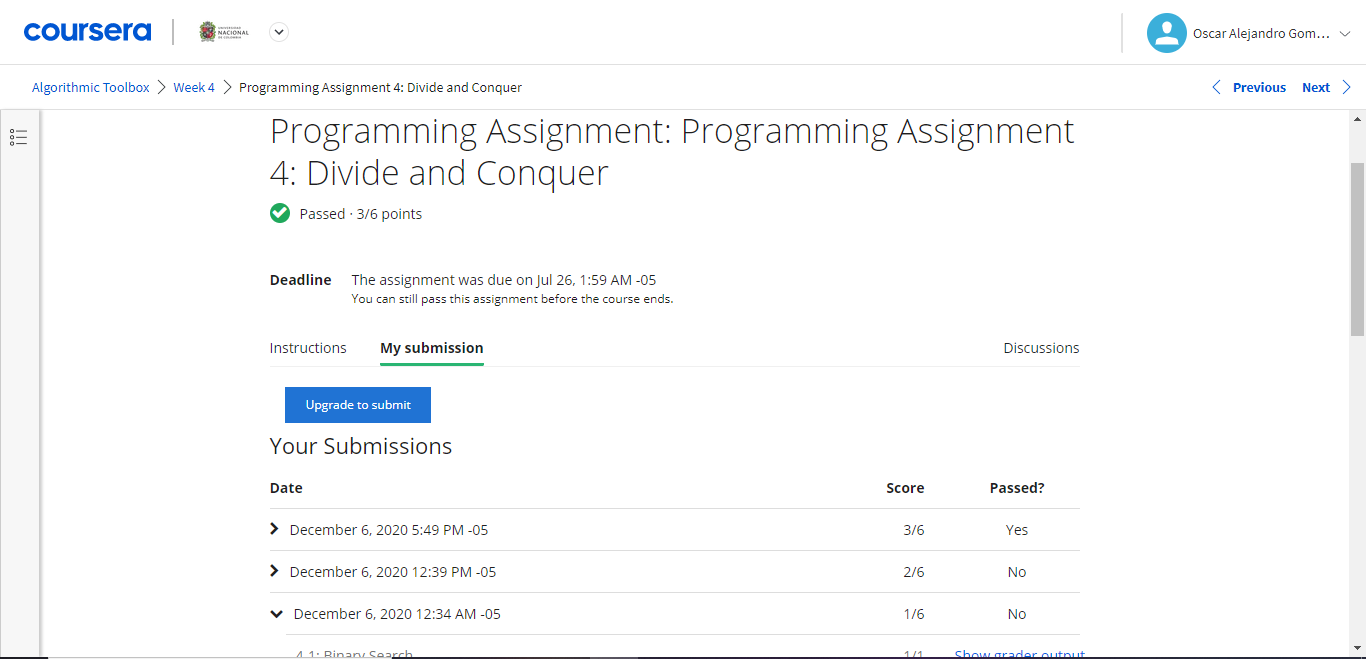